# 3차 프로그래밍 과제

III. 3차 프로그래밍과제 구현 내용

(1) II. 데이터 셋에서 주어진 특징들을 선택하여 CPU 성능 즉, “PRP” 변수를 예측하는 LinearRegression 기반 다중 선형 회귀 모델링을 프로그래밍 하시오.
- 데이터 탐색 및 시각화, 전처리, 훈련 데이터와 테스트 데이터 분리, 훈련 데이터 학습과정, 교차 검증, 분석 결과 시각화 등을 포함하여 최적화하는 전체 과정을 포함하시오.

(2) (1) 단계에서 얻은 다중 선형 회귀 모델을 사용하여 학습 데이터와 테스트 데이터 각각에 대해 이 모델의 성능을 평가하시오. 
- Mean squared Error, Mean absolute Error, R^2, 교차검증

(3) (2) 단계에서 얻은 모델의 테스트 데이터에 대해 R^2가 90% 이상이 나오도록 모델을 개선하시오.

In [42]:
import pandas as pd

machine = pd.read_csv("machine.data_update.csv")
machine

,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,Aug-80,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


<Axes: >

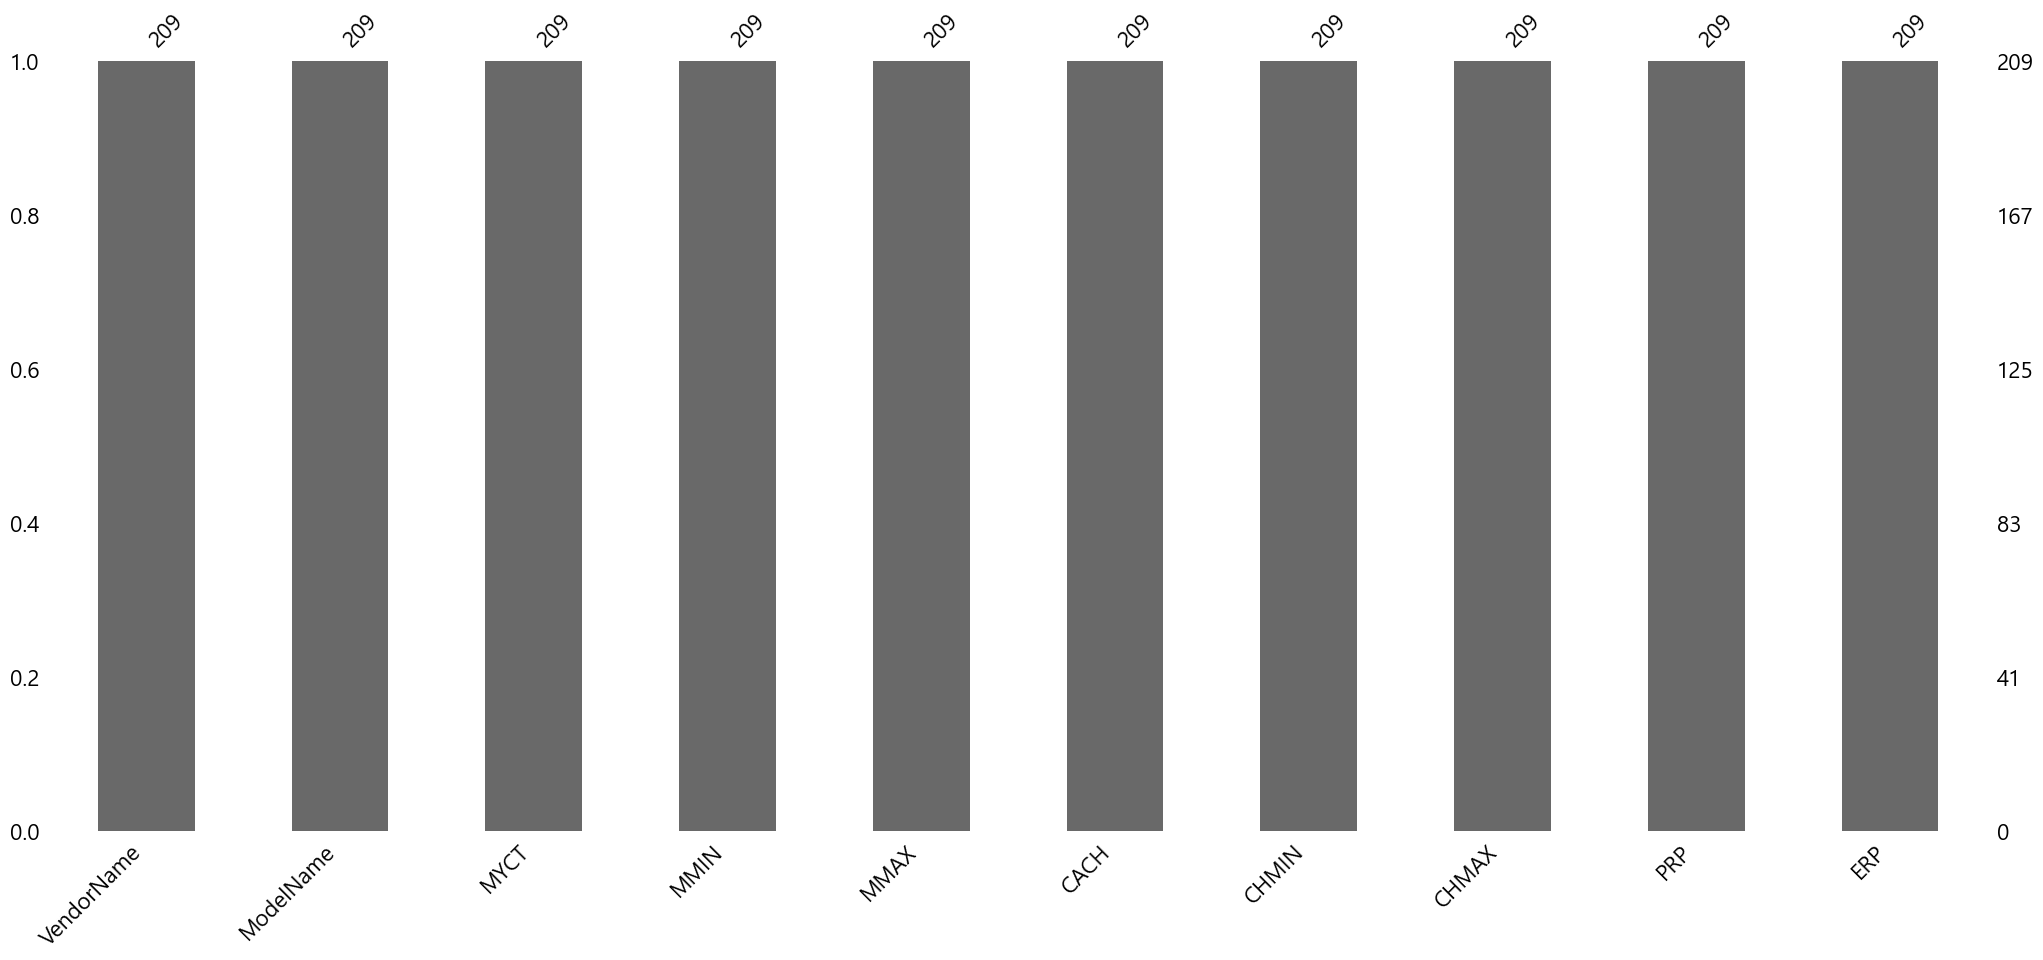

In [43]:
# 결측값 찾기
machine.isna().sum()
import missingno as msno
msno.bar(machine)

### 결측값이 없음을 확인

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
plt.rc('figure', figsize=(10, 6))
plt.rcParams["font.family"] = 'Malgun Gothic'

# 범주형 변수 수치화
dum_vendor = pd.get_dummies(machine['VendorName'], prefix='vendor', dtype=float)
machine = pd.concat([machine.drop('VendorName', axis=1), dum_vendor], axis=1)

dum_model = pd.get_dummies(machine['ModelName'], prefix='model', dtype=float)
machine = pd.concat([machine.drop('ModelName', axis=1), dum_model], axis=1)

# 상관계수 계산 및 출력
result = machine.corr()['PRP']

# 상관계수 내림차순 정렬
result_sorted = result.sort_values(ascending=False)
print(result_sorted)

PRP                 1.000000
ERP                 0.966472
MMAX                0.863004
MMIN                0.794931
CACH                0.662641
                      ...   
vendor_magnuson    -0.070672
vendor_honeywell   -0.072489
vendor_hp          -0.080281
vendor_formation   -0.086669
MYCT               -0.307099
Name: PRP, Length: 247, dtype: float64


### 상관계수 PRP(자기자신), ERP, MMAX, MMIN, CACH 가 관계가 높은 것을 확인

훈련 데이터 성능:
MSE: 1623.200095176985
MAE : 23.889679694860796
R^2 : 0.9155658543907284

테스트 데이터 성능:
MSE : 2192.4980714677677
MAE : 29.344641616839926
R^2 : 0.9569311804847215

교차 검증 성능 :
MSE 평균 : 2236.176409015727
MAE 평균 : 26.244933428333013
R^2 평균 : 0.8659399549814255


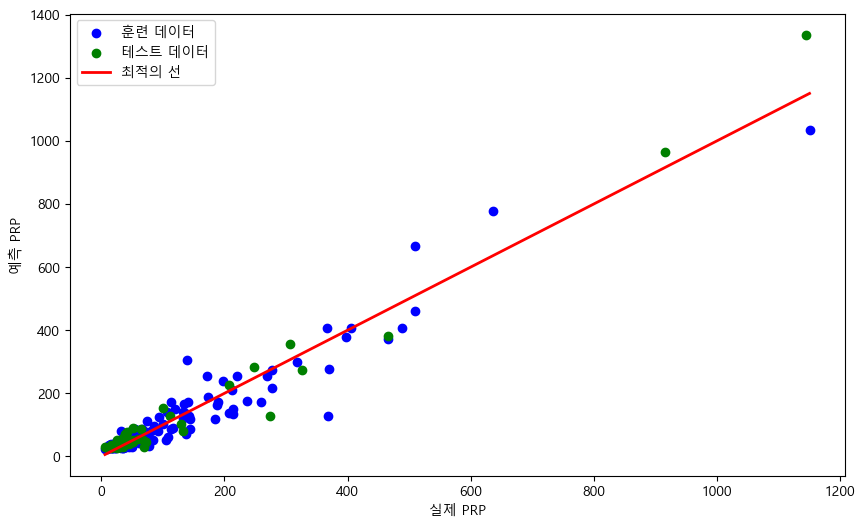

In [52]:
# features 선택
features = ['ERP', 'MMAX', 'MMIN', 'CACH']

# 데이터 분리
X = machine[features]
y = machine['PRP']

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 선택 및 학습
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# 예측
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

# 성능 평가
print("훈련 데이터 성능:")
print(f"MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"MAE : {mean_absolute_error(y_train, y_train_pred)}")
print(f"R^2 : {r2_score(y_train, y_train_pred)}")
print()

print("테스트 데이터 성능:")
print(f"MSE : {mean_squared_error(y_test, y_test_pred)}")
print(f"MAE : {mean_absolute_error(y_test, y_test_pred)}")
print(f"R^2 : {r2_score(y_test, y_test_pred)}")
print()

# 교차 검증 MSE 계산
print("교차 검증 성능 :")
cv_mse_scores = -cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"MSE 평균 : {cv_mse_scores.mean()}")

# 교차 검증 MAE 계산
cv_mae_scores = -cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"MAE 평균 : {cv_mae_scores.mean()}")

# 교차 검증 R^2 계산
cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"R^2 평균 : {cv_scores.mean()}")

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='b', label='훈련 데이터')
plt.scatter(y_test, y_test_pred, color='g', label='테스트 데이터')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='r', linewidth=2, label='최적의 선')
plt.xlabel('실제 PRP')
plt.ylabel('예측 PRP')
plt.legend()
plt.show()

### 테스트 데이터의 R^2 점수가 90 이상인 것을 확인했다

In [56]:
# 성능 지표 저장
performance = {
    'model': ['Linear Regression', 'Linear Regression', 'Linear Regression'],
    'data': ['Train', 'Test', 'CrossValidation'],
    'mse': [1626.595283325392, 1995.075994588389, 2400.7051890292482],
    'mae': [23.75374938439722, 28.561505735370847, 26.327669341786464],
    'R^2': [0.9153892465828892, 0.9608092846017104, 0.8609231154663114]
}

# 데이터프레임 생성
performance_df3 = pd.DataFrame(performance)

# 데이터프레임을 CSV 파일로 저장
performance_df3.to_csv('performance_results3.csv', index=False)

performance_df3

,model,data,mse,mae,R^2
0,Linear Regression,Train,1626.595283,23.753749,0.915389
1,Linear Regression,Test,1995.075995,28.561506,0.960809
2,Linear Regression,CrossValidation,2400.705189,26.327669,0.860923
